In [1]:
import os
os.chdir("/volume1/home/tdeng/SingleCell/scRNA-FeatureSelection/")
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import pandas as pd
from matplotlib import ticker
import matplotlib.gridspec as gridspec

%matplotlib inline
# plt.style.use('default')  # ggplot
# matplotlib.rcParams['font.family'] = 'Arial' # 'Times New Roman'

In [2]:
vratio = pd.read_csv("revision/PC_var_ratio.csv", index_col=0)
vratio_cumsum = vratio.cumsum().stack().rename('Cumulative Explained Variance Ratio').to_frame().reset_index(names=['Number of Principal Components', 'Dataset'])
HC_ARI = pd.read_csv("revision/HC_cell_ARI.csv", index_col=0).stack().rename('ARI (HC Cells)').to_frame().reset_index(names=['Number of Principal Components', 'Dataset'])
all_cell_metrics = pd.read_excel("revision/All_cell.xlsx", index_col=[0, 1])
all_cell_ari = all_cell_metrics.loc[:, 'ARI', :].stack().rename('ARI (All Cells)').to_frame().reset_index(names=['Number of PCs', 'Dataset'])

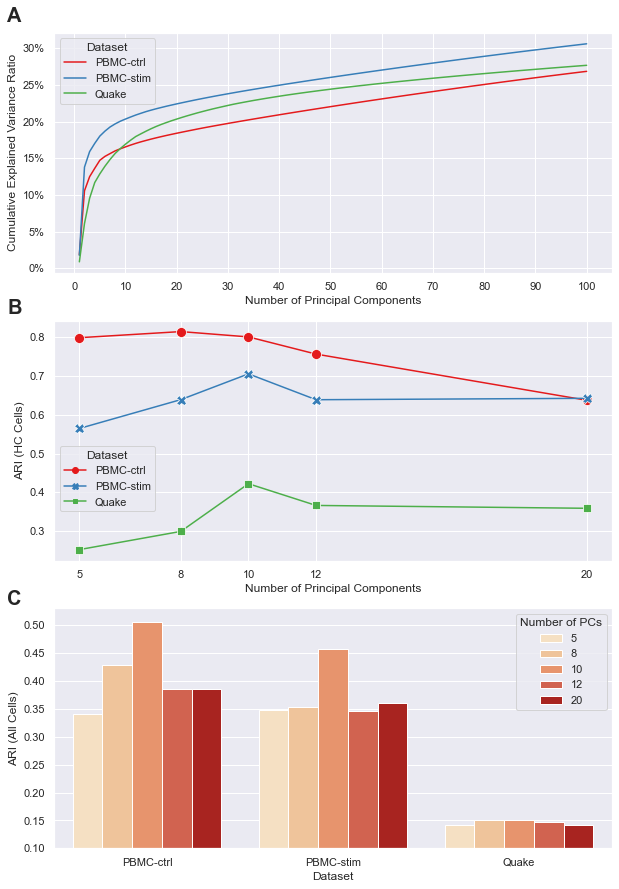

In [3]:
sns.set_theme(context='notebook', style="darkgrid", font='Arial', palette=sns.color_palette("Set1"))
fig, axes = plt.subplots(3, 1, sharex=False, figsize=(10, 15))
# fig.tight_layout()
sns.lineplot(x="Number of Principal Components", y="Cumulative Explained Variance Ratio",
             hue="Dataset", ax=axes[0], data=vratio_cumsum)
axes[0].set_xticks(np.arange(stop=vratio.shape[0]+1, step=10))
axes[0].yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals=0))

sns.lineplot(x="Number of Principal Components", y="ARI (HC Cells)", markersize=10,
             hue="Dataset", style="Dataset", dashes=False, markers=True, ax=axes[1], data=HC_ARI)
axes[1].set_xticks(HC_ARI['Number of Principal Components'].unique())
sns.move_legend(axes[1], bbox_to_anchor=(0.00, 0.5), loc=2)
# axes[1].legend(bbox_to_anchor=(0.6, 0.55), loc=2) #  , prop={"size":12}


sns.barplot(x="Dataset", y="ARI (All Cells)", hue="Number of PCs",
            palette='OrRd', ax=axes[2], data=all_cell_ari)  # Wistia
axes[2].set_ylim([0.1, 0.53])

fig.text(0.06, 0.89, s='A', fontdict={'size':20, 'weight':'bold'})
fig.text(0.06, 0.62, s='B', fontdict={'size':20, 'weight':'bold'})
fig.text(0.06, 0.35, s='C', fontdict={'size':20, 'weight':'bold'})
plt.savefig(f"revision/principle_components.png", bbox_inches='tight', dpi=1000)